In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
products = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Product_info.csv')
account = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Account_info.csv')
sales = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Sales_info.csv')

In [6]:
print(type(products))
products

<class 'pandas.core.frame.DataFrame'>


,encrypt_sku,product_dsc,sub_cat_cd,subcat_dsc_ext,catg_cd,cat_dsc_ext,department_cd,department_dsc_ext,brand_cd,brand_dsc,capacity_unit,conversion_factor
0,23121635,DET LÍQ MÁQ ROUPA OMO 96D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,96.00
1,23226017,DET LÍQ MÁQ ROUPA OMO 55D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,55.00
2,15751913,DET MAN PÓ ROUPA OMO 540GR,10104,det. manual roupa,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,KG,0.54
3,22159862,TOALHITAS PROTEÇÃO COR CONTINENTE 20UN,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,9798,CONTINENTE,UN,20.00
4,22765574,(I)DESINFE LIQUIDO ROUPACNT PRO 500ML,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,38313,CONT.PROTECT,LT,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2906,23992205,MASSA PANZANI MACH EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2907,23992193,MASSA PANZANI SPAG EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2908,23992199,MASSA PANZANI FARFALLE 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2909,23959868,PASTA BERRUTO ARRIGHI CONCHIGLIO 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,41369,BERRUTO,UN,1.00


In [13]:
print(type(account))
account

<class 'pandas.core.frame.DataFrame'>


,account_no,family_members,segment_gender_f,segment_gender_m,age_group,district,region,segment_cd_lifestyle,segment_dsc_lifestyle,segment_cd_lifestage,segment_dsc_lifestage
0,839904903518,5,0,0,>=65 anos,braga,litoral norte,1,Os Saudáveis Exigentes,2,Senior
1,839915544120,3,0,0,55-65 anos,braga,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
2,839958948398,4,0,0,35-45 anos,aveiro,litoral norte,3,Os Pais Práticos,4,Family With Kids
3,839960123646,17,0,0,45-55 anos,porto,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
4,839991834603,1,0,0,55-65 anos,NaN,NaN,7,Os Promocionais Atentos,3,Family With Young Adults
...,...,...,...,...,...,...,...,...,...,...,...
3108,840267515632,3,0,0,35-45 anos,setúbal,litoral sul,7,Os Promocionais Atentos,5,Active Adults
3109,840271411371,2,0,0,25-35 anos,aveiro,litoral norte,6,Os Económicos Focados,5,Active Adults
3110,840297031294,2,0,0,35-45 anos,ilha da madeira,litoral sul,1,Os Saudáveis Exigentes,5,Active Adults
3111,840297937268,1,0,0,18-25 anos,setúbal,litoral sul,2,Os Urbanos Sofisticados,3,Family With Young Adults


In [176]:
print(type(sales))
sales

<class 'pandas.core.frame.DataFrame'>


,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.000,0.89,1.09,0.0,0.10,0.00
1,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,15244838,4.000,1.63,2.00,2.0,3.15,0.00
2,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,22020944,1.000,1.94,2.39,0.8,3.15,0.00
3,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,6071048,1.000,0.82,0.87,0.0,11.26,0.09
4,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,20167550,1.000,5.36,6.59,4.4,11.26,0.66
...,...,...,...,...,...,...,...,...,...,...,...
148115,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,21862649,1.000,1.13,1.39,0.0,7.80,0.00
148116,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,19242485,1.000,0.97,1.19,0.0,7.80,0.00
148117,840019224482,2fL94Vy/w4uWWJJXhYwg+XmWdbokEpLEOyb439p7nLxnij...,20240922,P,20670689,1.000,1.27,1.35,0.0,0.20,0.00
148118,839967948997,51X+G6JcrvmpQNgT+H6UJ+4Ms1nqOr2LUsFmuwmfCPiQT5...,20241023,P,24000260,1.000,2.68,3.30,0.0,2.73,0.52


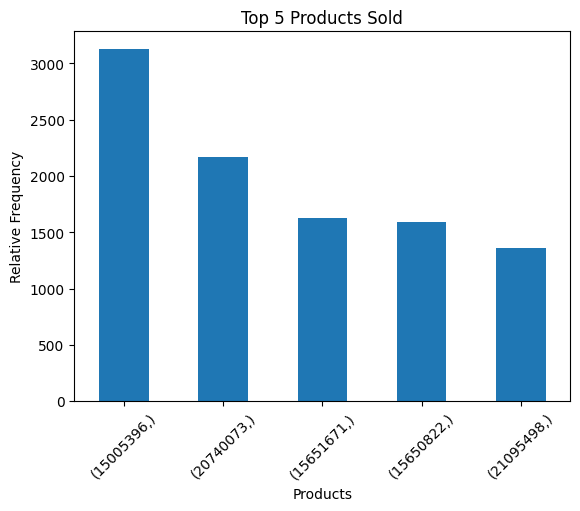

In [11]:
#Check the frequency of each product on the sales data
products_frequency = sales[['encrypt_sku']].value_counts()
products_frequency

#Top 5 products sold
top_5_products = products_frequency.head(5)
top_5_products.plot (kind ='bar')
plt.title('Top 5 Products Sold')
plt.ylabel('Relative Frequency')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Caracterization of the Transactions
transaction_sizes = sales.groupby('transaction_id')['encrypt_sku'].count()
transaction_sizes.describe()

count    58593.000000
mean         2.527947
std          2.192949
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: encrypt_sku, dtype: float64

In [ ]:
# Products that appear in, at least, 10% of the transactions
products_transaction_frequency = products_frequency [products_frequency >= len('transaction_id') * 0.1]
print(f"Number of items with support ≥ 0.1: {len(products_transaction_frequency)}")

Number of items with support ≥ 0.1: 2549


In [20]:
# Encode the Transactions
transactions = sales.groupby('transaction_id')['encrypt_sku'].apply(list).reset_index()
transaction_list = transactions['encrypt_sku'].tolist()

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_matrix = te.fit(transaction_list).transform(transaction_list)
encoded_sales= pd.DataFrame(transactions_matrix, columns=te.columns_)


In [21]:
# Run Apriori to Get Frequent Co-Purchased Products (0.1% of the transactions)
min_supp = 0.003
freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True) 
print(f"Number of Frequent Co-Purchased Products: {len(freq_copurchased)}")

Number of Frequent Co-Purchased Products: 201


In [22]:
# Generate association rules from frequent itemsets
rules = association_rules(freq_copurchased, metric="confidence", min_threshold=0.01)

# Sort by confidence and lift
highlighted_rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Filter for high values of confidence and lift
highlighted_rules = highlighted_rules[(highlighted_rules['confidence'] > 0.05) & (highlighted_rules['lift'] > 1.2)]

# Show top 10
print(highlighted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


   antecedents consequents   support  confidence      lift
0    (5902283)  (15005396)  0.003789    0.323144  6.054999
15  (20740070)  (20740073)  0.003499    0.244048  6.601792
7   (13794689)  (20740073)  0.003499    0.229050  6.196096
2    (6071048)  (15650822)  0.003055    0.211085  7.793382
5    (6563438)  (20740073)  0.003618    0.194495  5.261343
12  (20670689)  (15005396)  0.003243    0.174472  3.269216
11  (15651671)  (15005396)  0.004028    0.145231  2.721300
9   (15650822)  (15005396)  0.003721    0.137366  2.573934
3   (15650822)   (6071048)  0.003055    0.112791  7.793382
4   (20740073)   (6563438)  0.003618    0.097876  5.261343


In [210]:
#Get top 10 combinations of co-purchased products by support
freq_copurchased['itemset_str'] = freq_copurchased['itemsets'].apply(lambda x: ', '.join(str(i) for i in x))
freq_copurchased['count'] = (freq_copurchased['support'] * len(transactions)).astype(int)

top_combinations = freq_copurchased.sort_values(by='support', ascending=False)
print(top_combinations.head(10))

      support    itemsets itemset_str  count
80   0.053368  (15005396)    15005396   3127
123  0.036967  (20740073)    20740073   2166
87   0.027734  (15651671)    15651671   1625
85   0.027085  (15650822)    15650822   1587
124  0.023245  (21095498)    21095498   1362
76   0.022545  (14737544)    14737544   1321
35   0.021999   (6806705)     6806705   1289
127  0.021061  (21098186)    21098186   1234
64   0.020770  (13277543)    13277543   1217
160  0.020429  (22128164)    22128164   1197


                                itemsets_desc   support    itemsets
80               AÇÚCAR BRANCO CONTINENTE 1KG  0.053368  (15005396)
123           PEITO DE FRANGO (2KG) COMPRA/AT  0.036967  (20740073)
87                ESPARGUETE CONTINENTE 500GR  0.027734  (15651671)
85                  ESPARGUETE CONTINENTE 1KG  0.027085  (15650822)
124              BIFE DE FRANGO CONTINENTE LS  0.023245  (21095498)
76               ARROZ BASMATI CONTINENTE 1KG  0.022545  (14737544)
35                    ARROZ AGULHA CIGALA 1KG  0.021999   (6806705)
127                PEITO FRANGO CONTINENTE LS  0.021061  (21098186)
64   BATATA FRITA CAMPONESA CONTINENTE 175 GR  0.020770  (13277543)
160     BATATA FRITA PALHA CONT.POUPANCA 400G  0.020429  (22128164)


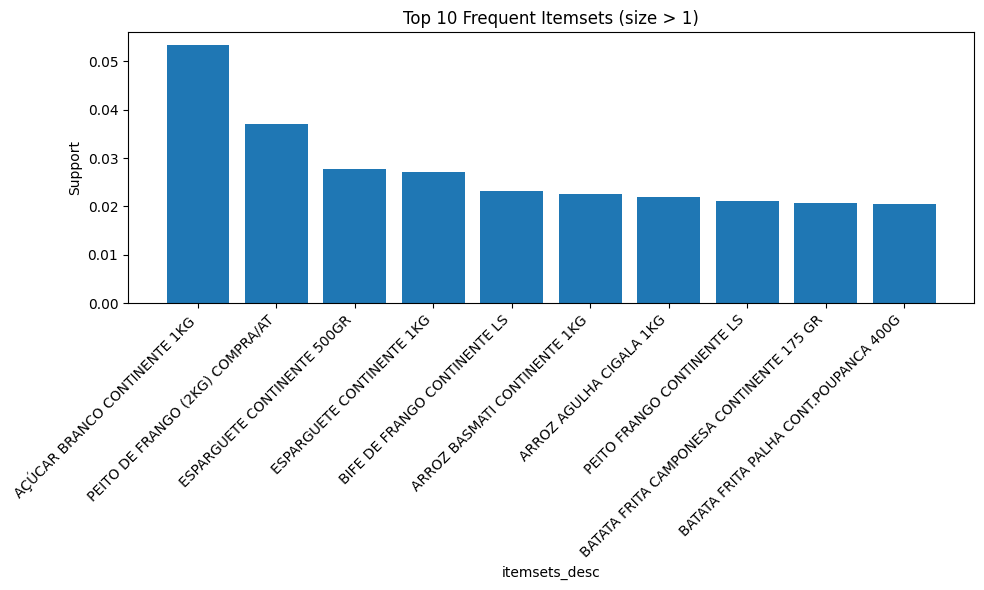

In [211]:
# Filter itemsets with more than 1 item
freq_copurchased['length'] = freq_copurchased['itemset_str'].apply(lambda x: len(x))
filtered = freq_copurchased[freq_copurchased['length'] > 1]

#Encrypting sku mapping to product description
products['encrypt_sku'] = products['encrypt_sku'].astype(str)
sku_to_desc = dict(zip(products['encrypt_sku'], products['product_dsc']))

def itemset_to_description(itemset):
    # If itemset is a string, split it; if not, convert to list of strings
    if isinstance(itemset, str):
        codes = [code.strip() for code in itemset.split(',')]
    else:
        codes = [str(code) for code in itemset]
    # Map each code to its description, or keep the code if missing
    return ', '.join([sku_to_desc.get(code,f" [{code}]") for code in codes])

# Get top 10 by support
top10 = filtered.sort_values(by='support', ascending=False).head(10)
top10['itemsets_desc'] = top10['itemsets'].apply(itemset_to_description)
print(top10[['itemsets_desc', 'support', 'itemsets']])

#Plot
plt.figure(figsize=(10, 6))
plt.bar(top10['itemsets_desc'], top10['support'])
plt.title("Top 10 Frequent Itemsets (size > 1)")
plt.xlabel("itemsets_desc")
plt.ylabel("Support")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Confidence')

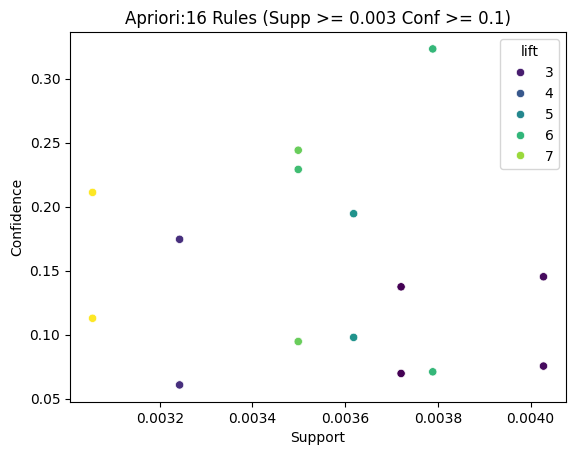

In [162]:
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='viridis')
plt.title(f'Apriori:{len(rules)} Rules (Supp >= {min_supp} Conf >= {min_conf})')
plt.xlabel('Support')
plt.ylabel('Confidence')

In [200]:
top10['itemsets_desc'] = top10['itemsets'].apply(itemset_to_description)
print(top10[['itemsets_desc', 'support', 'itemsets']])

                               itemsets_desc   support    itemsets
50              AÇÚCAR BRANCO CONTINENTE 1KG  0.053368  (15005396)
74           PEITO DE FRANGO (2KG) COMPRA/AT  0.036967  (20740073)
56               ESPARGUETE CONTINENTE 500GR  0.027734  (15651671)
54                 ESPARGUETE CONTINENTE 1KG  0.027085  (15650822)
75              BIFE DE FRANGO CONTINENTE LS  0.023245  (21095498)
47              ARROZ BASMATI CONTINENTE 1KG  0.022545  (14737544)
23                   ARROZ AGULHA CIGALA 1KG  0.021999   (6806705)
77                PEITO FRANGO CONTINENTE LS  0.021061  (21098186)
42  BATATA FRITA CAMPONESA CONTINENTE 175 GR  0.020770  (13277543)
95     BATATA FRITA PALHA CONT.POUPANCA 400G  0.020429  (22128164)


In [ ]:
#Segmentation of the Customers - Recency, Frequanty and Monetary (RFM) Analysis
#Recency - Days Since Last Purchase
recency = sales.groupby('account_no')['time_key'].max().reset_index()
recency['recency'] = (pd.Timestamp('today') - pd.to_datetime(recency['time_key'])).dt.days

#Frequency - Number of Purchases
frequency = sales.groupby('account_no')['transaction_id'].nunique().reset_index().rename(columns={'transaction_id': 'frequency'})

#Monetary - Total Amount Spent
monetary = sales.groupby('account_no')['net_sls_amt'].sum().reset_index().rename(columns={'net_sls_amt': 'monetary'})

# Combine RFM metrics
RFM = recency[['account_no', 'recency']].merge(frequency, on='account_no').merge(monetary, on='account_no')

print(RFM.head())


     account_no  recency  frequency  monetary
0  839899069356    20241         49  196.4456
1  839899131480    20241          5   27.8100
2  839899152393    20241          8   93.9700
3  839899368213    20241         62  350.1400
4  839899439729    20241         28  578.5300
